In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/content/retail_store_sales_data.csv')
df.head()

,StoreID,StoreLocation,AnnualSales,NumberOfEmployees,MonthlyFootTraffic,CustomerSatisfactionScore,AverageTransactionValue,OperatingHours,StoreSize,ProductVariety
0,1,Urban,765951.617844,8,7509.409098,5.997531,219.688047,9-5,346.424362,100
1,2,Suburban,970260.353170,19,4177.683775,9.706365,138.874730,11-7,291.921515,137
2,3,NaN,472994.222706,47,4494.583873,8.463078,256.652304,10-6,844.609463,168
3,4,Suburban,419841.833555,26,5574.808511,8.850156,445.311051,11-7,889.861148,99
4,5,Suburban,139476.186790,41,2180.563539,NaN,440.451917,10-6,419.352320,95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreID                    3123 non-null   int64  
 1   StoreLocation              2811 non-null   object 
 2   AnnualSales                3123 non-null   float64
 3   NumberOfEmployees          3123 non-null   int64  
 4   MonthlyFootTraffic         3123 non-null   float64
 5   CustomerSatisfactionScore  2811 non-null   float64
 6   AverageTransactionValue    3123 non-null   float64
 7   OperatingHours             2811 non-null   object 
 8   StoreSize                  3123 non-null   float64
 9   ProductVariety             3123 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 244.1+ KB


In [4]:
df.shape

(3123, 10)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['StoreLocation'] = le.fit_transform(df['StoreLocation'])
df.head()

,StoreID,StoreLocation,AnnualSales,NumberOfEmployees,MonthlyFootTraffic,CustomerSatisfactionScore,AverageTransactionValue,OperatingHours,StoreSize,ProductVariety
0,1,2,765951.617844,8,7509.409098,5.997531,219.688047,9-5,346.424362,100
1,2,1,970260.353170,19,4177.683775,9.706365,138.874730,11-7,291.921515,137
2,3,3,472994.222706,47,4494.583873,8.463078,256.652304,10-6,844.609463,168
3,4,1,419841.833555,26,5574.808511,8.850156,445.311051,11-7,889.861148,99
4,5,1,139476.186790,41,2180.563539,NaN,440.451917,10-6,419.352320,95


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreID                    3123 non-null   int64  
 1   StoreLocation              3123 non-null   int64  
 2   AnnualSales                3123 non-null   float64
 3   NumberOfEmployees          3123 non-null   int64  
 4   MonthlyFootTraffic         3123 non-null   float64
 5   CustomerSatisfactionScore  2811 non-null   float64
 6   AverageTransactionValue    3123 non-null   float64
 7   OperatingHours             2811 non-null   object 
 8   StoreSize                  3123 non-null   float64
 9   ProductVariety             3123 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 244.1+ KB


In [7]:
X = df.drop(['StoreID','NumberOfEmployees','MonthlyFootTraffic','AverageTransactionValue','OperatingHours','ProductVariety'], axis=1)

In [8]:
X.head()

,StoreLocation,AnnualSales,CustomerSatisfactionScore,StoreSize
0,2,765951.617844,5.997531,346.424362
1,1,970260.353170,9.706365,291.921515
2,3,472994.222706,8.463078,844.609463
3,1,419841.833555,8.850156,889.861148
4,1,139476.186790,NaN,419.352320


In [12]:
X.dropna(inplace=True)

In [13]:
X.isnull().sum()

StoreLocation                0
AnnualSales                  0
CustomerSatisfactionScore    0
StoreSize                    0
dtype: int64

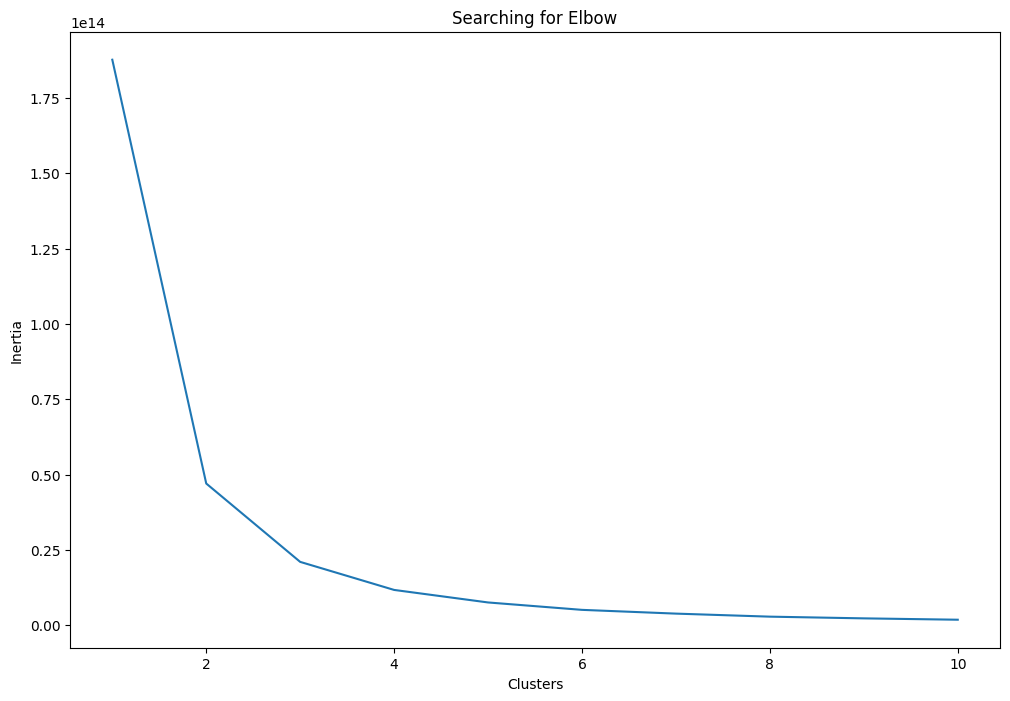

In [15]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

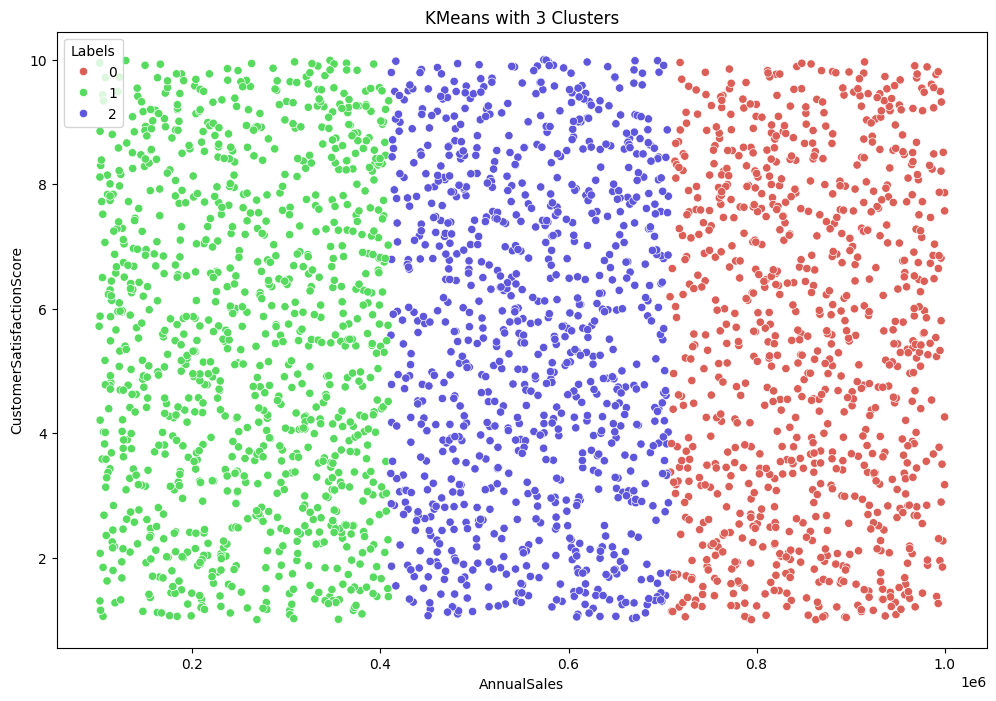

In [17]:
km3 = KMeans(n_clusters=3).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='AnnualSales', y='CustomerSatisfactionScore', hue='Labels', data=X,
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocess data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['AnnualSales', 'MonthlyFootTraffic', 'AverageTransactionValue', 'CustomerSatisfactionScore']])

# Determine optimal K
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

optimal_k = np.argmax(silhouette_scores) + 2

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k)
cluster_labels = kmeans.fit_predict(scaled_data)

# Analyze results
print(kmeans.cluster_centers_)
print(cluster_labels)


[[ 0.92757337  0.76502396  0.83213029 -0.74631012]
 [-0.73312123 -0.81970544 -0.66845243  0.87419926]
 [ 0.72751258 -0.78913351  0.90093941  0.79849641]
 [-0.89443743 -0.6985723   0.70328945 -0.82776964]
 [ 0.89992155  0.64687731 -0.76187367  0.80732877]
 [-0.75872785  0.82971819  0.78245176  0.67004818]
 [-0.67322446  0.84320586 -0.84885652 -0.73695696]
 [ 0.76579655 -0.77454566 -0.74319507 -0.84140619]]
[4 4 1 ... 4 6 1]


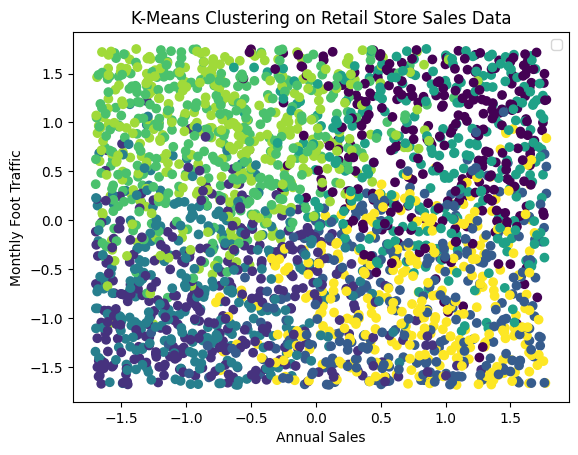

In [19]:
import matplotlib.pyplot as plt

# Assume 'cluster_labels' contains the cluster assignments for each data point
# and 'scaled_data' contains the scaled data points

# Create a scatterplot with different colors for each cluster
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels)

# Add title and labels
plt.title('K-Means Clustering on Retail Store Sales Data')
plt.xlabel('Annual Sales')
plt.ylabel('Monthly Foot Traffic')
plt.legend()
# Show the plot
plt.show()


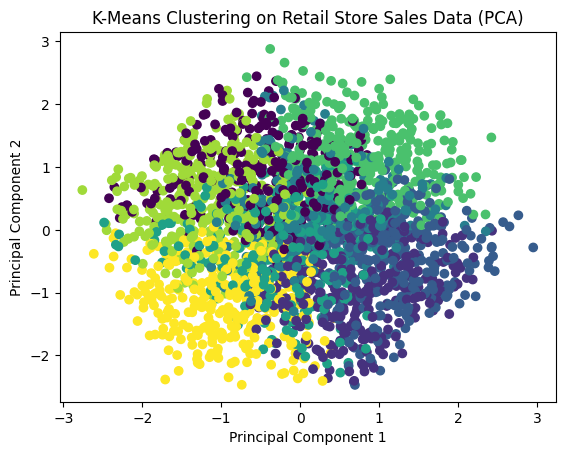

In [20]:
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a scatterplot
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
plt.title('K-Means Clustering on Retail Store Sales Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



3D **Representation**

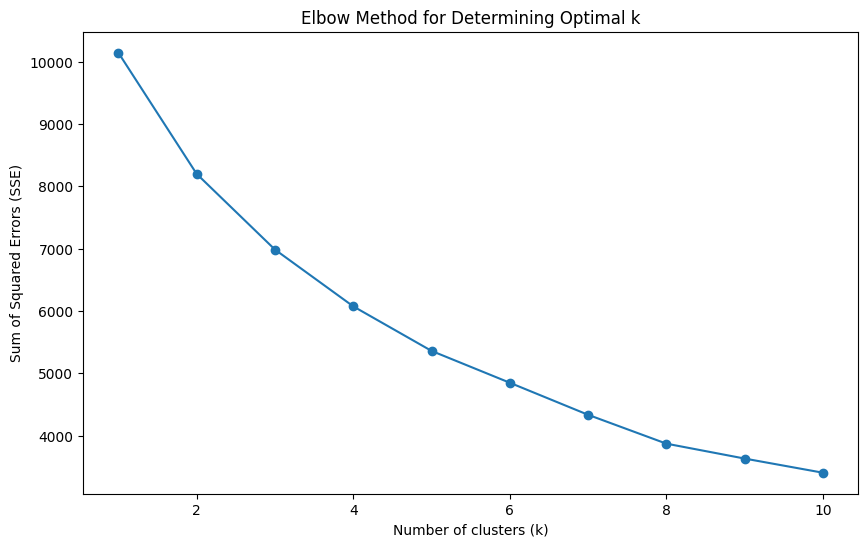

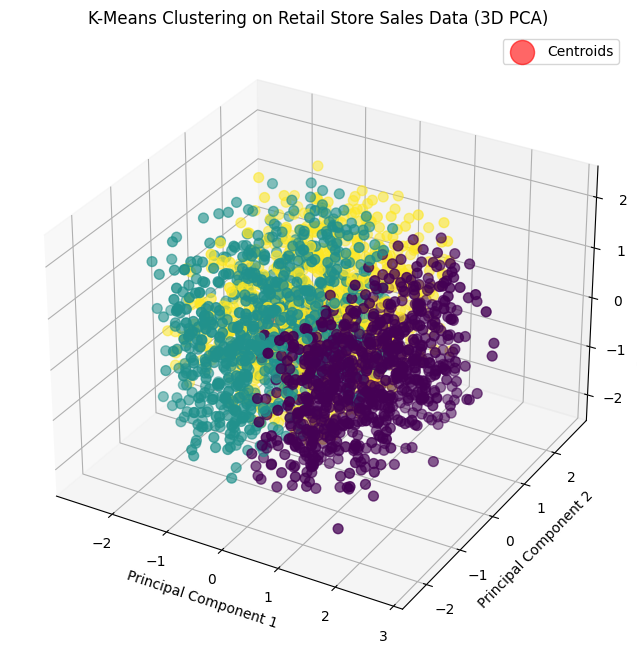

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv('/content/retail_store_sales_data.csv')

# Drop rows with missing values in 'CustomerSatisfactionScore' and 'StoreLocation'
df = df.dropna(subset=['CustomerSatisfactionScore', 'StoreLocation'])

# Convert 'StoreLocation' to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['StoreLocation'], drop_first=True)

# Select relevant features and drop the 'StoreID' and 'OperatingHours' columns
features = ['AnnualSales', 'MonthlyFootTraffic', 'AverageTransactionValue', 'CustomerSatisfactionScore']
data = df[features]

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=30)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Determining Optimal k')
plt.show()

# Let's assume the elbow point is at k=3 for this example
optimal_k = 3

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=30)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Visualize the clusters using PCA (3 components)
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=cluster_labels, cmap='viridis', s=50)

# Plot the centroids
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
ax.scatter(centers_pca[:, 0], centers_pca[:, 1], centers_pca[:, 2], c='red', s=300, alpha=0.6, label='Centroids')

# Add labels
ax.set_title('K-Means Clustering on Retail Store Sales Data (3D PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()
